# Workshop on piecewise deterministic Markov processes (PDMPs)

### Importing necessary libraries

In [101]:
# Required libraries
import math 
import numpy as np
import matplotlib.pyplot as plt # for plotting the results
import random

In this worshop you will be asked to complete the following tasks:

1) Random Walk and lifted random walk
- Implement the Random walk vs lifted random walk on a lattice with boundaries. 
- Test the correctness of both algorithms.
- Show the trajectories of both algorithms.
- Plot the autocorrelation function of both algorithm in a single figure and comment qualitatively the results. 

2) PDMPs for linear regression
- Simulate data from the linear regression with one parameter (1 dimensional case).
- Implement a 1 dimensional PDMP (following the given procedure).
- Plot traces, plot empirical distribution (histogram).
- Compute the mean and the variance.
 
### Random Walk and Lifted Random Walk
As explained in the lecture, we can use both random walk and lifted random walk for sampling from $\mathcal{U}(\{-N,-N+1,\dots,N-1,N\})$

Simulate and save the trajectory of a random walk on a lattice $\{-N,-N+1,\dots,N-1, N\}$ where $N$ is the boundary. In the interior, the random walk make the move  $x \to x \pm 1$ with probability $1/2$. At the boundaries, it stays still with probability $1/2$, as described by the diagram below: 

![image](rw.png)


In [102]:
# template for random walk 
random.seed(1234) # setting the seed for automating marking (do not delete)

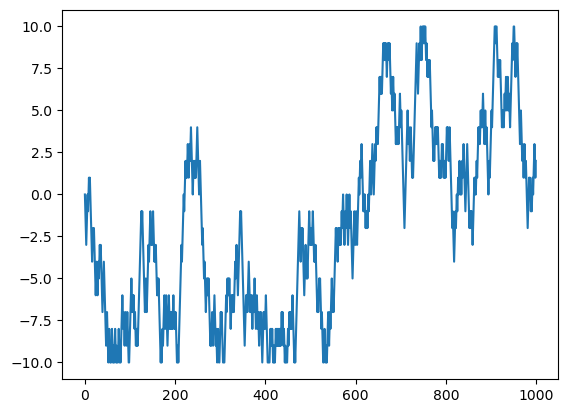

In [103]:
# SOLUTIONS WITH MARKS
# CHECK AND ADAPT AND ADD BOUNDARIES
random.seed(1234)
def random_walk(steps, initial_state, boundary):
    state = initial_state
    trajectory = [state]
    for _ in range(steps):
        step = np.random.choice([-1, 1])
        if abs(state + step) <= boundary:
            state += step
        trajectory.append(state)
    return trajectory

# Simulate random walk 
steps = 10 ** 6
boundary = 10
initial_state = 0
trajectory_rw = random_walk(steps, initial_state, boundary)
plt.plot(trajectory_rw[0:1000])

We are going to test your implementation by checking if the mean and the variance are close to the mean and the variance of a uniform distribution from $-N$ to $N$.

In [104]:
### testing
empirical_mean_rw = np.mean(trajectory_rw)
if abs(empirical_mean_rw) > 0.1:
    raise ValueError(f"The empirical mean is {empirical_mean_rw} but the target mean is 0")

empirical_variance_rw = np.var(trajectory_rw)
target_variance = (boundary * (boundary + 1) / 3)
if abs((empirical_variance_rw / target_variance - 1)) > 0.01:
    raise ValueError(f"The empirical variance is {empirical_variance_rw} but the target variance is {target_variance}")

### Lifted Random Walk

In the interior, the lifted random walk with velocity $v = \pm 1$ makes the move $x \to x + v$ with probability $r = 1 -  1/(2N + 1)$ (1 minus the total number of lattice points), otherwise stays still and flip the velocity $v \to -v$. At the boundary, with probability $r$ stay still (both position and velocity), otherwise  in stays sill on the position component, and flips its velocity. This is illustrated by the diagram below;


![image](lrw.png)

In [105]:
# Template lifted random walk
random.seed(1234) # setting the seed for automating marking (do not delete)

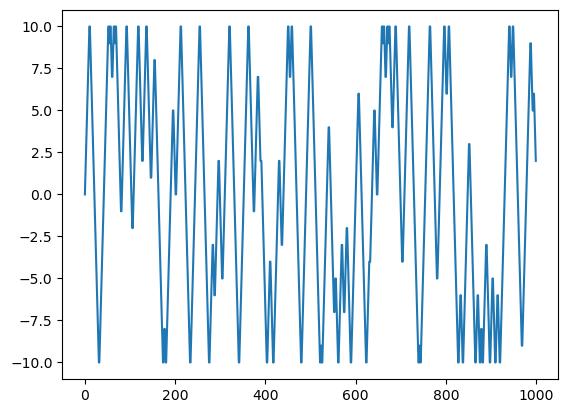

In [106]:
# SOLUTIONS WITH MARKS
random.seed(1234)  
def lifted_random_walk(steps, initial_state, initial_velocity, boundary):
    refresh_prob = 1 / (2 * boundary + 1) # optimal refresh probablity as explained during the lecture
    state = initial_state
    velocity = initial_velocity
    trajectory = [state]
    for _ in range(steps):
        if (refresh_prob > np.random.random()) and (abs(state) < boundary):
            velocity *= -1
        elif state * velocity == boundary :     
            velocity *= -1
        else: 
            state += velocity
        trajectory.append(state)
    return trajectory

# Simulate lifted random walk 
steps = 10 ** 6
boundary = 10
initial_state = 0
initial_velocity =  1
trajectory_lrw = lifted_random_walk(steps, initial_state, initial_velocity, boundary)
plt.plot(trajectory_lrw[0:1000])

In [107]:
### testing
empirical_mean_lrw = np.mean(trajectory_lrw)
if abs(empirical_mean_lrw) > 0.1:
    raise ValueError(f"The empirical mean is {empirical_mean_lrw} but the target mean is 0")

empirical_variance_lrw = np.var(trajectory_lrw)
target_variance = (boundary * (boundary + 1) / 3)
if abs((empirical_variance_lrw / target_variance - 1)) > 0.01:
    raise ValueError(f"The empirical variance is {empirical_variance_lrw} but the target variance is {target_variance}")

If all tests passed without errors, we are ready to compare the two algorithms. 
We do so, by plotting the empoirical autocorrelation function of both trajectories.



In [ ]:
# template for plots 
# use numpy.correlate()

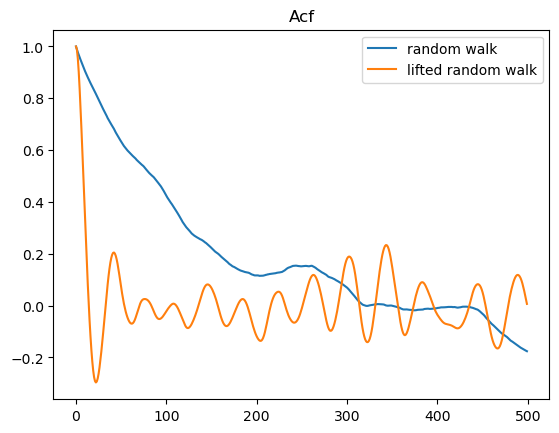

In [108]:
# SOLUTIONS WITH MARKS 
# autocorr_rw = np.correlate(trajectory_rw[0:1000], trajectory_rw[0:1000], mode='full')
# autocorr_rw = autocorr_rw/max(autocorr_rw)
max_lag = 2000
full_acf_rw = np.correlate(trajectory_rw[0:max_lag], trajectory_rw[0:max_lag], mode='full')
acf_rw = full_acf_rw[full_acf_rw.size // 2:]
acf_rw = acf_rw/max(acf_rw)

full_acf_lrw = np.correlate(trajectory_lrw[0:max_lag], trajectory_lrw[0:max_lag], mode='full')
acf_lrw = full_acf_lrw[full_acf_lrw.size // 2:]
acf_lrw = acf_lrw/max(acf_lrw)
# autocorr_lrw = np.correlate(trajectory_lrw[0:1000], trajectory_lrw[0:1000], mode='full')
# autocorr_lrw = autocorr_lrw/max(autocorr_lrw)

plt.plot(acf_rw[0:500], label = "random walk")
plt.plot(acf_lrw[0:500], label = "lifted random walk")
plt.title('Acf')
plt.legend()
plt.show()

Simulate $N$ synthetic data points $(x_i,y_i)_{i=1,2,\dots,N}$ from a linear regression model with one covariate $(x_1,\dots,x_N)$ where
- $x_i \sim \mathcal{N}(0,1)$
- $y_i \sim \mathcal{N}(x_i\beta, \sigma^2)$, $\sigma = 1.0, \beta = 10.0$,


and plot the points $(x_i, y_i)$ for $i=1,2,\dots,N$.

In [109]:
# template for simulating data 
# use numpy.random.normal
# store y = (y_1,y_2,...,y_N) as a numpy.array 
random.seed(1234) 



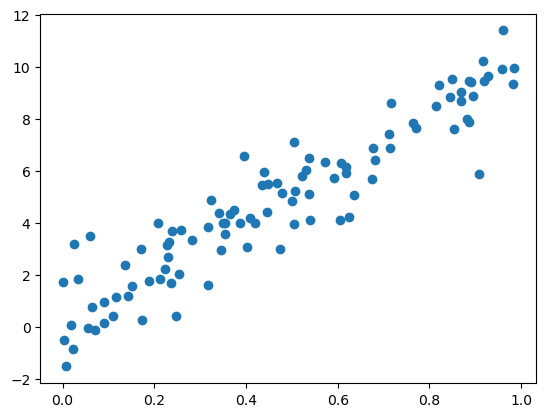

In [110]:
# SOLUTIONS WITH MARKS
# CHECK AND ADAPT
random.seed(1234) # setting the seed for automating marking (do not delete)

def simulate_linear_regression_data(N, beta, noise_std):

    x = np.random.rand(N)
    noise = np.random.normal(0, noise_std, N)
    y = beta * x + noise
    
    return x, y

# Parameters
N = 100  # Number of data points
true_beta = 10.0  # True slope parameter
noise_std = 1.0 # Standard deviation of noise

# Simulate data
x, y = simulate_linear_regression_data(N, true_beta, noise_std)
plt.scatter(x, y)

The posterior for $\beta$ given an uninformative prior is (up to a constant of proportionality)
$$
\pi(\beta) \propto \prod_{i=1}^N \exp\left(-\frac{(y_i - \beta x_i)^2}{2\sigma^2}\right) = \exp\left(-\frac{\|y - \beta x\|^2}{2\sigma^2}\right).
$$
which means that the potential (negative log-density) is 
$$
\frac{\|y - \beta x\|^2}{2\sigma^2}.
$$

The derivative with respect to $\beta$ is then 
$$
\frac{1}{\sigma^2}\sum_{i=1}^N x_i(\beta x_i-y_i) 
$$

The **rate function** of the PDMP event times at position $\beta$ and velocity $v$ is then
$$
\lambda(\beta + vt,v) = \max\left[\frac{1}{\sigma^2}\left(\sum_{i=1}^N x_i((\beta + vt) x_i-y_i)\right)v, 0\right].
$$

Task: find $a,b$ such that $\lambda(\beta + vt,v) = \max(a + bt,0)$.


# Sample from the quadratic potential 
Since it is not trivial to sample the first event time of an inhomogeneous Poisson process with rate $\lambda(t) = \max(0, a + b*t)$, we provide this function to you. The function simulates $\tau$ such that $$\mathbb{P}(\tau > t) = \exp\left(- \int_0^t \lambda(s) ds)\right)$$.


In [ ]:
# provide the function 
# \lambda(t) = max(0, a + b*t)
#  simulate \tau such that P(\tau > t) = \exp(- \int_0^t \lambda(s) ds)
def poisson_time(a, b, u):
    if b > 0:
        if a < 0:
            return math.sqrt(-math.log(u)*2.0/b) - a/b
        else:  # a > 0
            return math.sqrt((a/b)**2 - math.log(u)*2.0/b) - a/b
    elif b == 0:
        if a > 0:
            return -math.log(u)/a
        else:
            return float('inf')
    else:  # b < 0
        if a <= 0:
            return float('inf')
        elif -math.log(u) <= -a**2/b + a**2/(2*b):
            return -math.sqrt((a/b)**2 - math.log(u)*2.0/b) - a/b
        else:
            return float('inf')

# Example usage
result = poisson_time(2, 3, 0.5)
print(result)

### Simulate PDMP, plot trace and compute empirical mean
Follow the procedure below and implement the PDMP for the logistic regression 


- Fill in the gaps in the tamplate
- Figure how to plot the trace
- Figure how to derive the mean from the skeleton points 


![image](1d_zz_procedure.png)

In [ ]:
# template 
random.seed(1234) # setting the seed for automating marking (do not delete)


$$
\lambda(\beta + vt,v) = \max\left[\frac{1}{\sigma^2}\left(\sum_{i=1}^N x_i((\beta + vt) x_i-y_i)\right)v, 0\right].
$$


In [ ]:
# SOLUTIONS
def pdmp_1d(beta, v, T, x, y, noise_std):
    t = 0.0
    times = [t]
    positions = [beta]
    a = np.sum(x * ( beta * x - y)) * v / noise_std ** 2  
    b = np.sum(x ** 2) * v ** 2 / noise_std ** 2
    tau = poisson_time(a, b, np.random.rand())
    while t < T:
        beta += tau*v
        v *= -1  
        t += tau
        times.append(t)
        positions.append(beta)
        a = np.sum(x * ( beta * x - y)) * v / noise_std ** 2  
        b = np.sum(x ** 2) * v ** 2 / noise_std ** 2
        tau = poisson_time(a, b, np.random.rand())
    return np.array(times), np.array(positions)

beta_0 = 0.0
v_0 = 1
T = 100.0
event_times, event_locations = pdmp_1d(beta_0, v_0, T, x, y, noise_std)
plt.plot(event_times, event_locations)


Let us discard the first 10 events which corresponds to the positioins and times before the sampler converged to the posterior. 
From the skeleton of $M$ event times and event locations, we can compute the empirical mean of $\beta$: 
$$
\overline \beta = \frac{1}{t_M - t_{10}}\int_{t_{10}}^{t_M} \beta(t) dt = \frac{1}{t_M - t_{10}} \sum_{k=10}^M \frac{(\beta_k + \beta_{k-1})(t_k - t_{k-1})}{2}
$$
where the right hand equality is the numerical integral with the midpoint rule, which, for piecewise linear functions, is an exact method. 

In [ ]:
# Compute the empirical mean


In [ ]:
# SOLUTIONS
denominator =  event_times[len(event_times)-1] - event_times[9]
beta_hat =  np.sum((event_times[10:] - event_times[9:len(event_times)-1])*(event_locations[10:] + event_locations[9:len(event_locations)-1]))/(2*denominator)

Finally, plot the the points $(x_i,y_i)$ for $i = 1,2,\dots,N$ and the estimated linear function interpolating the data. 


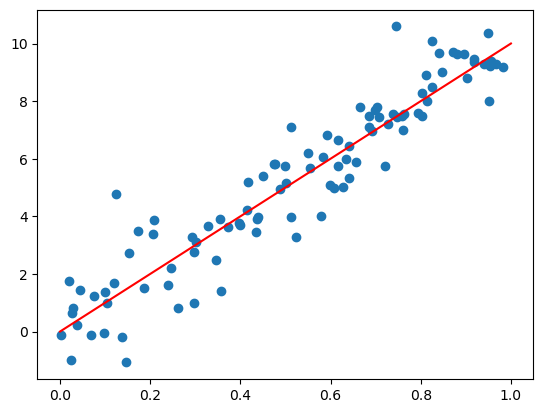

In [100]:
plt.scatter(x,y, label='data')
plt.plot([0,1],[0,10], label='estimated beta', color = 'red')
plt.show()
